# Prueba Auxiliar Analista de datos: 2. Análisis Exploratorio de Datos (EDA)
* **Nombre:** John Eduard Delgado Gómez
* **CC:** 1061820435
* **Celular:** 3148068955

In [114]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_limpia.csv', sep=";")
df.head()

,ID_Estudiante,Facultad,Programa,Año_Ingreso,Estado,Promedio,Asistencia,Beca,Actividad extracurricular
0,354,Artes,Artes Plásticas,2011,Egresado,2.51,63.64,No,No
1,1290,Humanidades,Historia,2013,Retirado,4.85,54.17,Sí,No
2,939,Artes,Artes Plásticas,2012,Retirado,8.06,85.96,No,Sí
3,1732,Ciencias Sociales,Trabajo Social,2013,Retirado,7.97,91.63,Sí,No
4,66,Artes,Artes Plásticas,2012,Activo,7.84,58.86,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Estudiante              1607 non-null   int64  
 1   Facultad                   1607 non-null   object 
 2   Programa                   1607 non-null   object 
 3   Año_Ingreso                1607 non-null   int64  
 4   Estado                     1607 non-null   object 
 5   Promedio                   1607 non-null   float64
 6   Asistencia                 1607 non-null   float64
 7   Beca                       1607 non-null   object 
 8   Actividad extracurricular  1607 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 113.1+ KB


In [4]:
# Columnas: Categóricas y numéricas
columnas = list(df.keys())
cols_categ = [x for x in columnas if df[x].dtype == 'object']
cols_num = [x for x in columnas if df[x].dtype != 'object']

In [5]:
# Comprobar datos faltantes
data_faltante = df.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,0
2,Programa,0
3,Año_Ingreso,0
4,Estado,0
5,Promedio,0
6,Asistencia,0
7,Beca,0
8,Actividad extracurricular,0


In [6]:
# Identificar valores únicos - Categorías
df.nunique()

ID_Estudiante                1578
Facultad                        6
Programa                       18
Año_Ingreso                    14
Estado                          4
Promedio                      765
Asistencia                   1366
Beca                            2
Actividad extracurricular       2
dtype: int64

In [7]:
# Resumen de 5 números
df.describe()

,ID_Estudiante,Año_Ingreso,Promedio,Asistencia
count,1607.000000,1607.000000,1607.000000,1607.000000
mean,993.728065,1918.049782,5.519540,75.031805
std,580.817720,433.365498,2.579285,14.453413
min,1.000000,0.000000,1.000000,50.100000
25%,487.500000,2012.000000,3.275000,62.420000
50%,993.000000,2016.000000,5.600000,75.140000
75%,1506.500000,2019.000000,7.710000,87.670000
max,2000.000000,2022.000000,10.000000,100.000000


In [8]:
# Análisis estadístico de los atributos categóricos
df.describe(include='object')

,Facultad,Programa,Estado,Beca,Actividad extracurricular
count,1607,1607,1607,1607,1607
unique,6,18,4,2,2
top,Ciencias Sociales,Contaduría,Retirado,No,No
freq,299,119,530,1147,1008


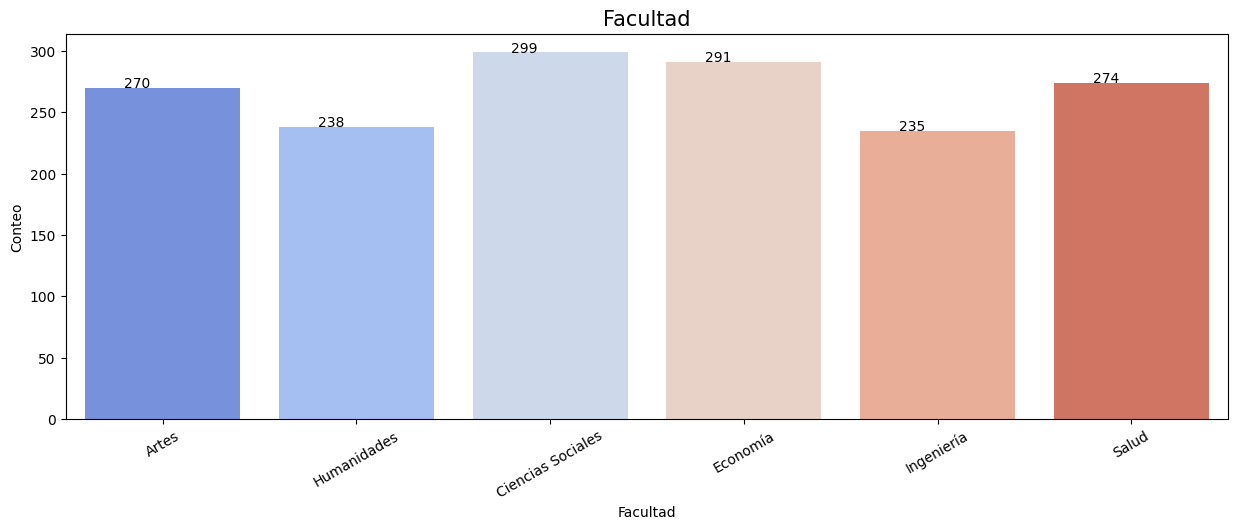

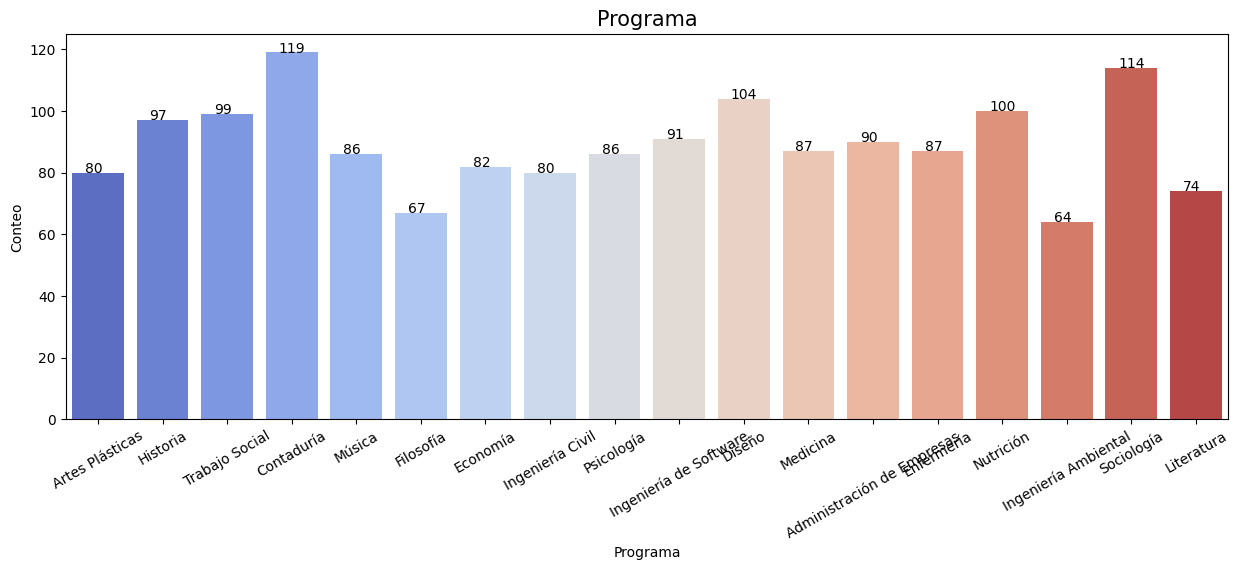

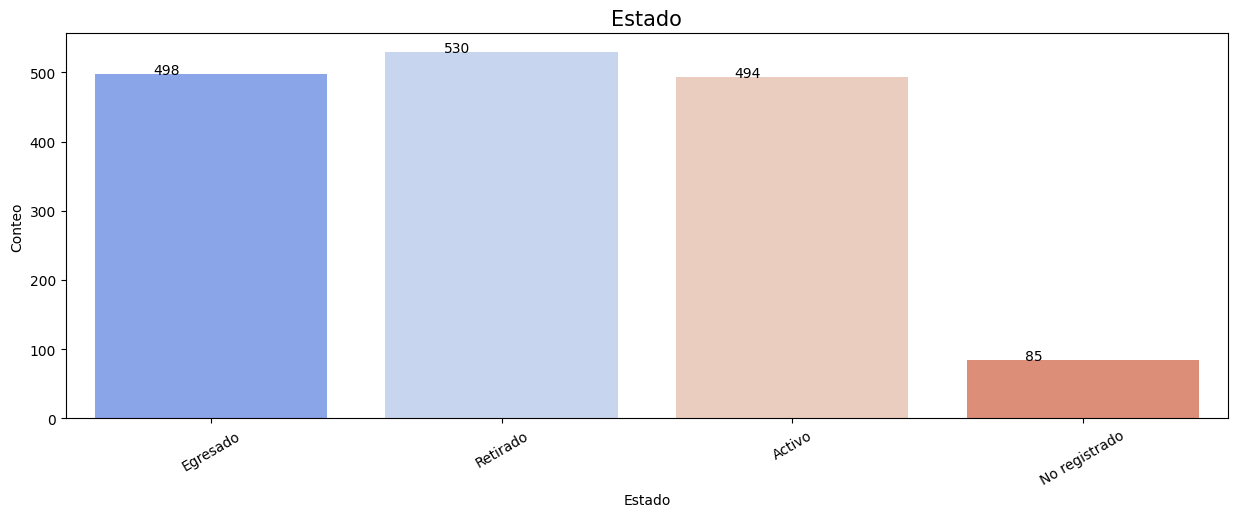

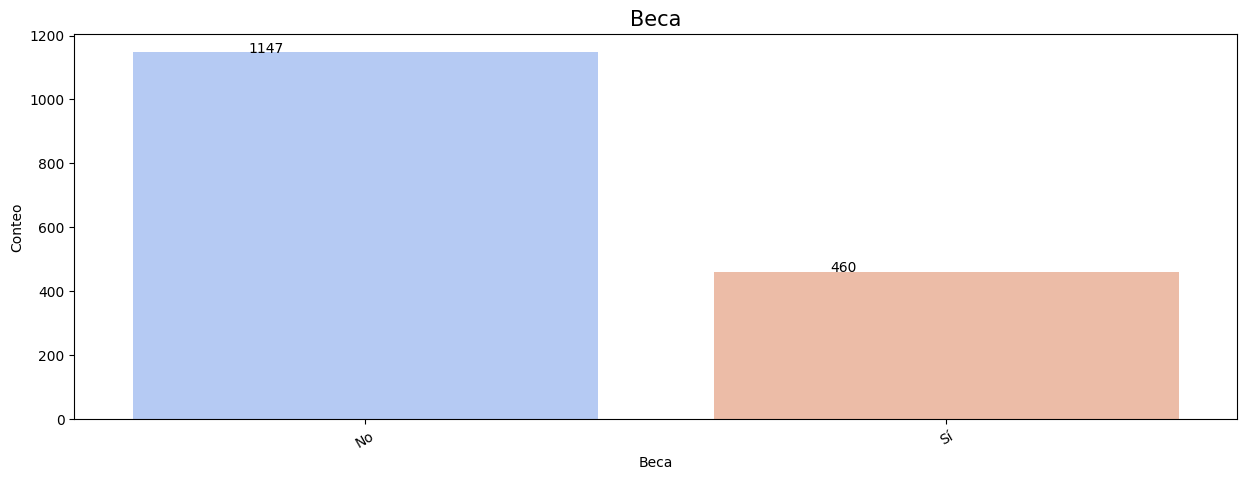

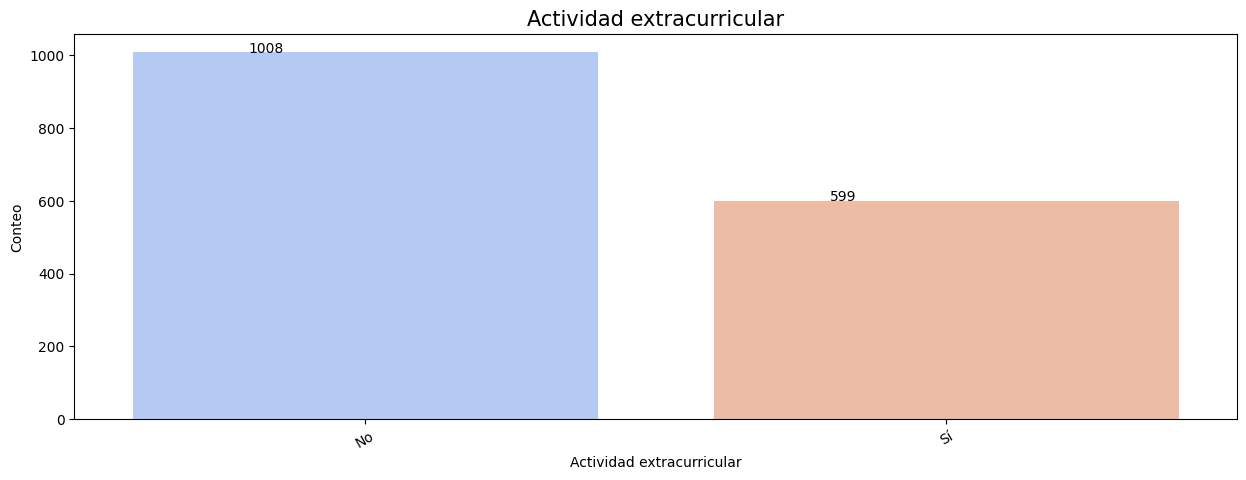

In [9]:
# Análisis gráfica de variables categóricas
for columna in cols_categ:
  plt.figure(figsize=(15,5))
  ax = sns.countplot(x=columna, data=df, hue=columna, palette='coolwarm')
  plt.title(columna, size=15)
  plt.ylabel('Conteo', size= 10)
  plt.xticks(rotation=30)
  for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/4, p.get_height()))
  plt.show()

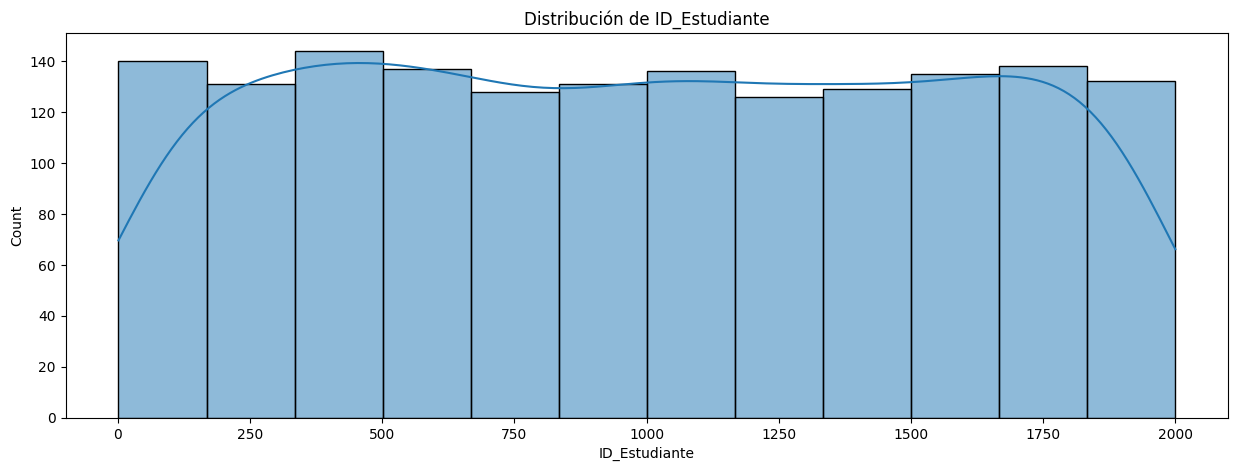

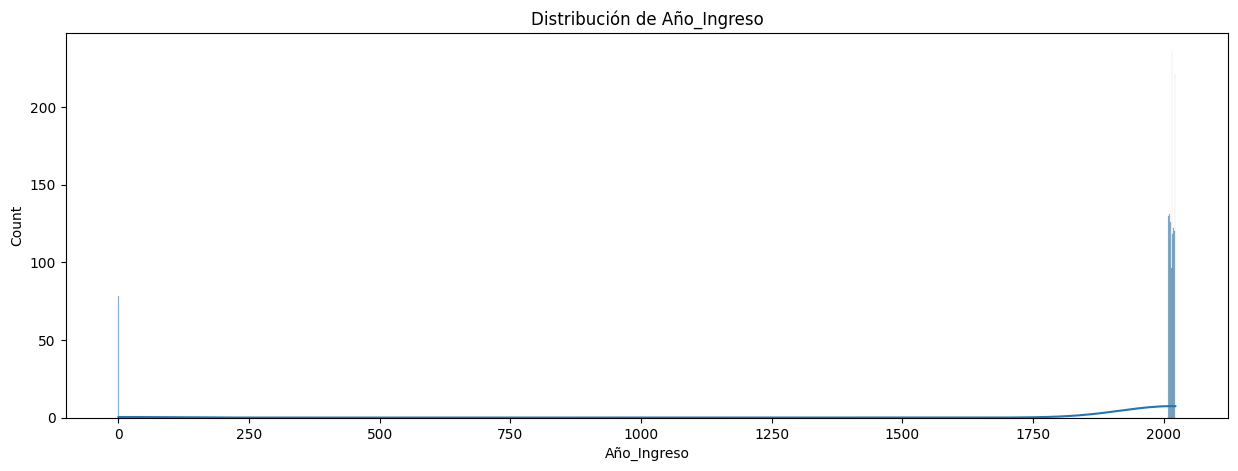

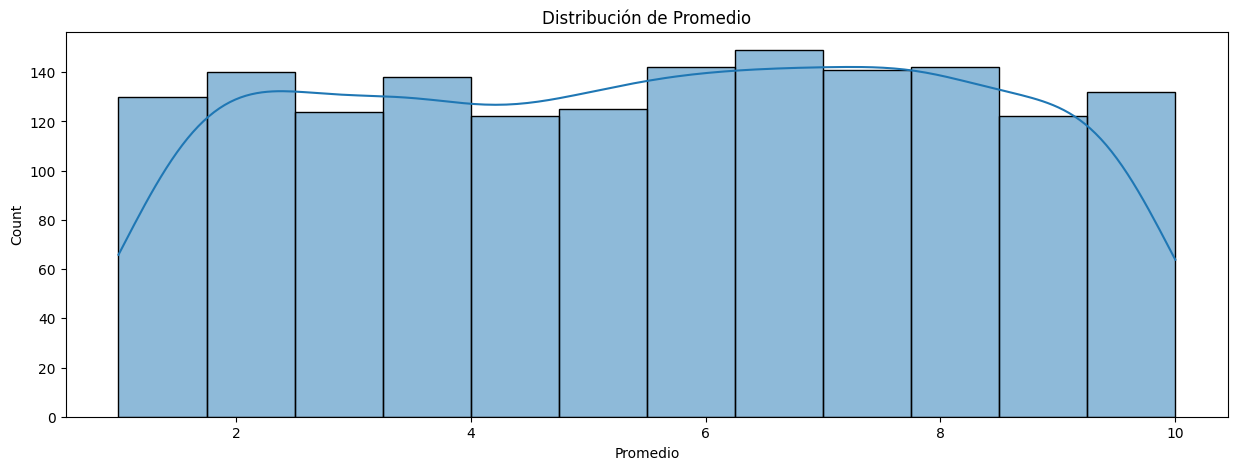

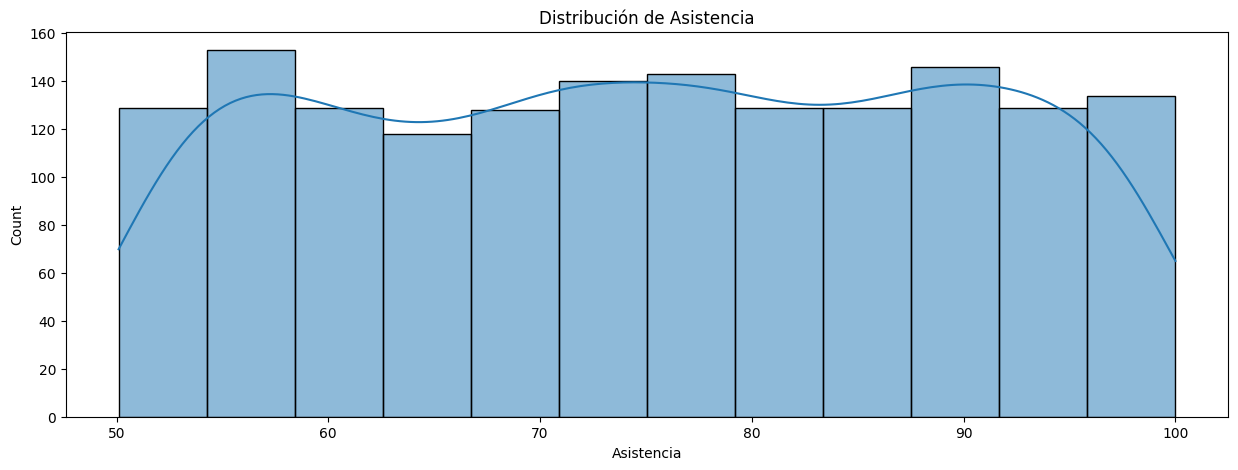

In [10]:
# Análisis gráfico de los atributos numéricos
columnas = list(df.keys())
cols_num = [x for x in columnas if df[x].dtype != 'object']
for col in cols_num:
  plt.figure(figsize=(15,5))
  sns.histplot(x=col, data=df, kde=True)
  plt.title(f'Distribución de {col}')
  plt.show()


## ¿Cuál es la distribución de estudiantes por facultad y programa?

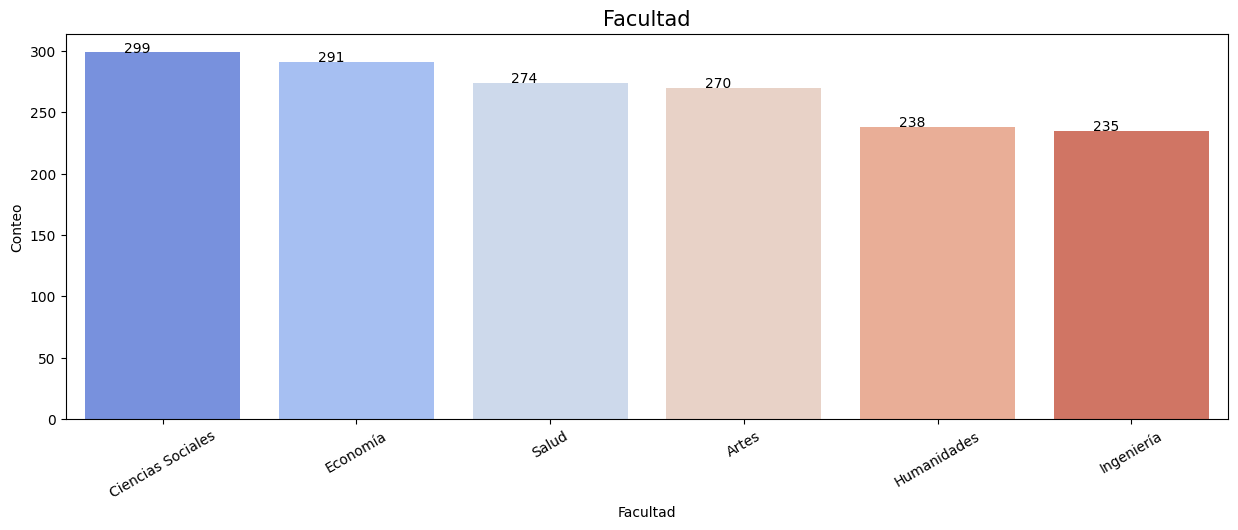

In [11]:
# Distribución de estudiantes por facultad
df_ordenado = df["Facultad"].value_counts().reset_index()
df_ordenado.columns = ["Facultad", "Conteo"]
df_ordenado = df_ordenado.sort_values("Conteo", ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_ordenado, x="Facultad", y="Conteo", hue="Facultad", palette='coolwarm', legend=False)
plt.title("Facultad", size=15)
plt.ylabel('Conteo', size= 10)
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/4, p.get_height()))
plt.show()

* La facultad de ciencias sociales tiene la mayor cantidad de estudiantes.
* La facultad con el menor número de estudiantes es la facultad de ingeniería.

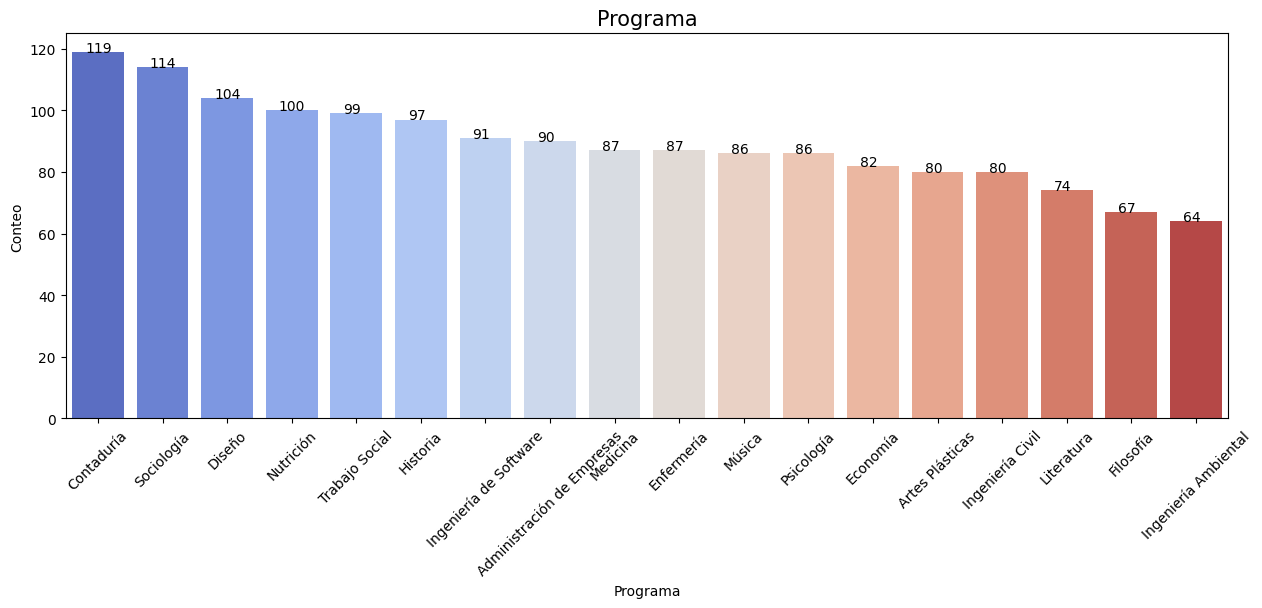

In [116]:
# Destribución de estudiantes por programa
df_ordenado = df["Programa"].value_counts().reset_index()
df_ordenado.columns = ["Programa", "Conteo"]
df_ordenado = df_ordenado.sort_values("Conteo", ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_ordenado, x="Programa", y="Conteo", hue="Programa", palette='coolwarm', legend=False)
plt.title("Programa", size=15)
plt.ylabel('Conteo', size= 10)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/4, p.get_height()))
plt.show()

* El programa de Contaduría tiene mayor cantidad de estudiantes, seguido de Sociología.
* El programa de Ingeniería Ambiental tiene la menor cantidad de estudiante.s

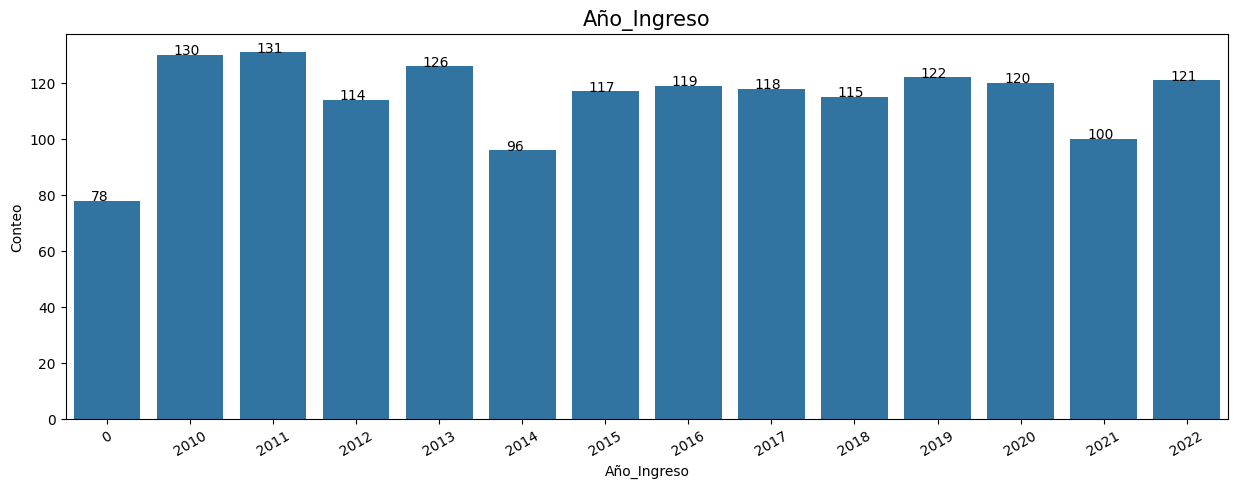

In [51]:
# Destribución de estudiantes por programa
df_ordenado = df["Año_Ingreso"].value_counts().reset_index()
df_ordenado.columns = ["Año_Ingreso", "Conteo"]

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_ordenado, x="Año_Ingreso", y="Conteo")
plt.title("Año_Ingreso", size=15)
plt.ylabel('Conteo', size= 10)
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/4, p.get_height()))
plt.show()

* El año 2011 cuenta con mayor inscripción de estudiantes.
* El año 2014 fue el peor año respecto a cantidad de estudiante. Sin embargo, se observan 78 estudiantes de los cuales no se tiene registro, una suposición inicial puede ser que parte de estos 78 estudiantes podrían estar distribuidos en los años 2021 y 2014 para alcanzar un valor más cercano al promedio.

# Análisis univariable variables categóricas restantes

In [13]:
cols_categ

['Facultad', 'Programa', 'Estado', 'Beca', 'Actividad extracurricular']

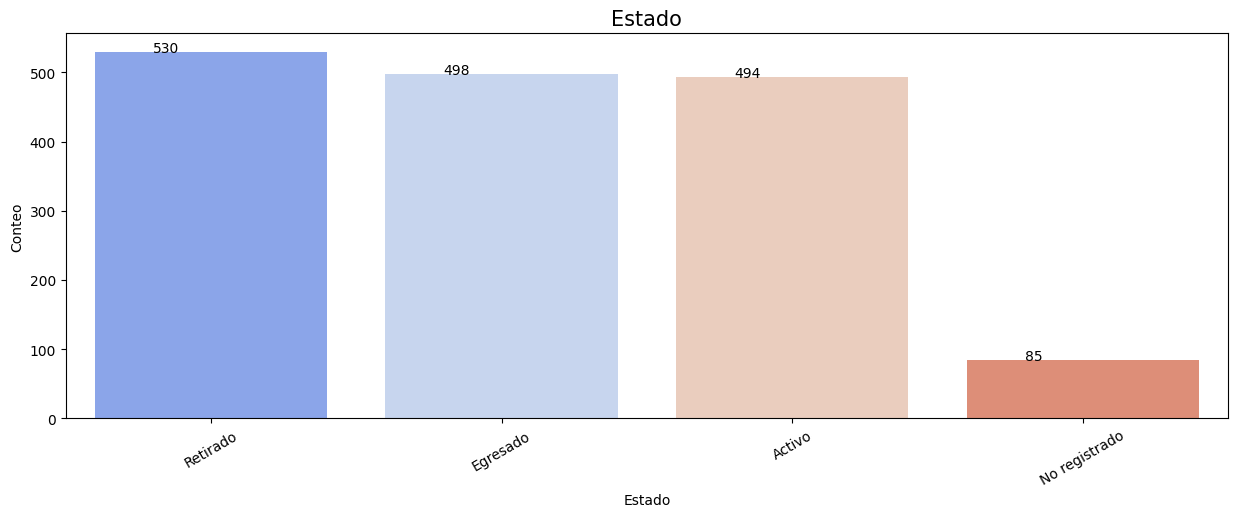

In [15]:
# Destribución de estudiantes por programa
df_ordenado = df["Estado"].value_counts().reset_index()
df_ordenado.columns = ["Estado", "Conteo"]
df_ordenado = df_ordenado.sort_values("Conteo", ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_ordenado, x="Estado", y="Conteo", hue="Estado", palette='coolwarm', legend=False)
plt.title("Estado", size=15)
plt.ylabel('Conteo', size= 10)
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/4, p.get_height()))
plt.show()

* No se cuenta con 85 registros, pero algo preocupante es ver que la cantidad de estudiantes Retirados sea mayor respecto a Egresados o Activos. Aunque los datos faltantes se distribuyeran en egresado o activo, el número de estudiantes no debería ser tan alto para retirados. Una recomendación es realizar un posterior estudio para conocer a que se debe el posible retiro y actuar para reducir estos números.

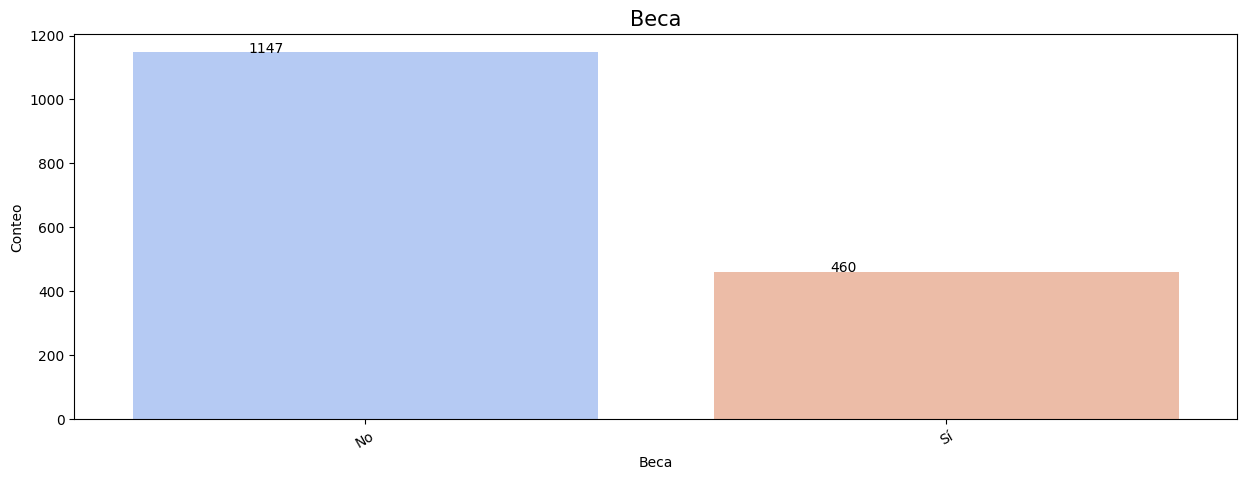

In [16]:
# Destribución de estudiantes por programa
df_ordenado = df["Beca"].value_counts().reset_index()
df_ordenado.columns = ["Beca", "Conteo"]
df_ordenado = df_ordenado.sort_values("Conteo", ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_ordenado, x="Beca", y="Conteo", hue="Beca", palette='coolwarm', legend=False)
plt.title("Beca", size=15)
plt.ylabel('Conteo', size= 10)
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/4, p.get_height()))
plt.show()

* Es normal encontrar una mayor cantidad de estudiantes no becados, queda conocer que requisitos son necesarios para acceder a una beca y realizar un posterior análisis para asegurarnos que en verdad las becas estén a estudiantes correctos.

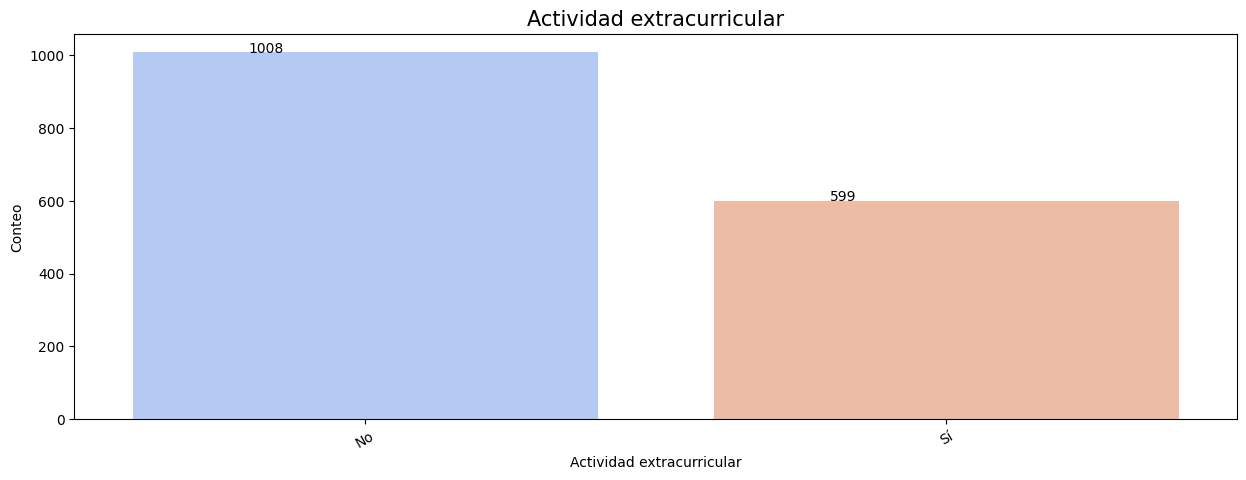

In [18]:
# Destribución de estudiantes por programa
df_ordenado = df["Actividad extracurricular"].value_counts().reset_index()
df_ordenado.columns = ["Actividad extracurricular", "Conteo"]
df_ordenado = df_ordenado.sort_values("Conteo", ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_ordenado, x="Actividad extracurricular", y="Conteo", hue="Actividad extracurricular", palette='coolwarm', legend=False)
plt.title("Actividad extracurricular", size=15)
plt.ylabel('Conteo', size= 10)
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/4, p.get_height()))
plt.show()

* Se podría incentivar más al desarrollo de actividades extracurriculares.

## Analisis univariable datos numericos

In [19]:
cols_num

['ID_Estudiante', 'Año_Ingreso', 'Promedio', 'Asistencia']

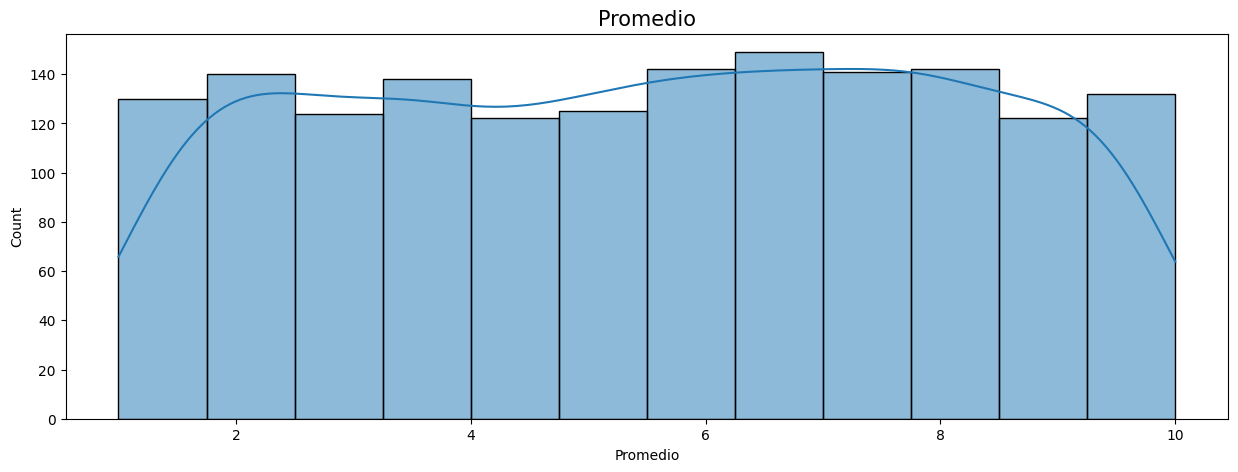

In [20]:
# Análisis gráfico de los atributos numéricos
plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, x="Promedio", kde=True)
plt.title("Promedio", size=15)
plt.show()

* Los datos de promedio tienen una distribución uniforme.

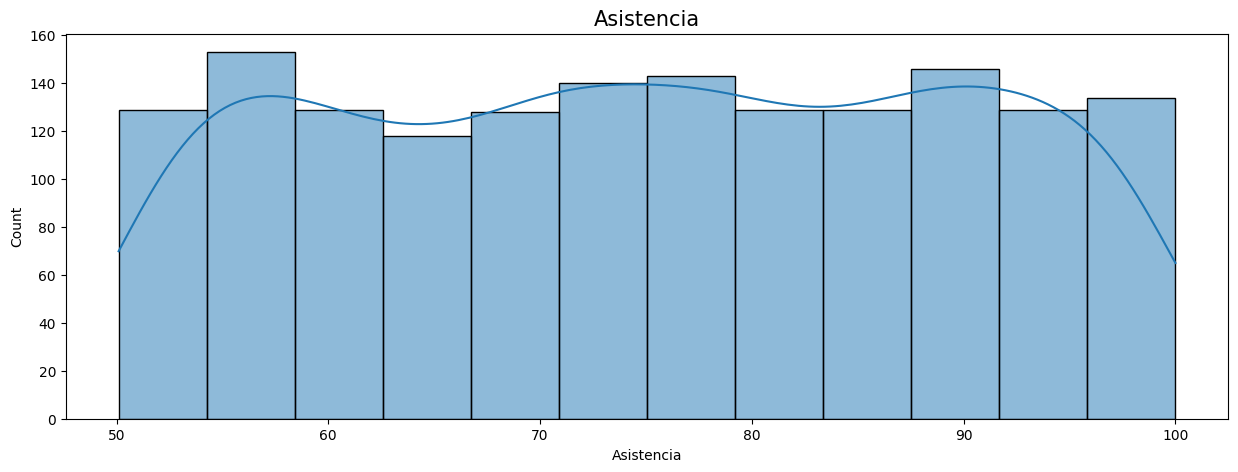

In [21]:
# Análisis gráfico de los atributos numéricos
plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, x="Asistencia", kde=True)
plt.title("Asistencia", size=15)
plt.show()

* La distribución de los datos de asistencia es uniforme, asumiendo que la asistencia parte desde alrededor de 50. Si graficáramos desde 0 notaríamos que está sesgada.

## ¿Cómo se relaciona la asistencia con el rendimiento académico?

<Axes: xlabel='Asistencia', ylabel='Promedio'>

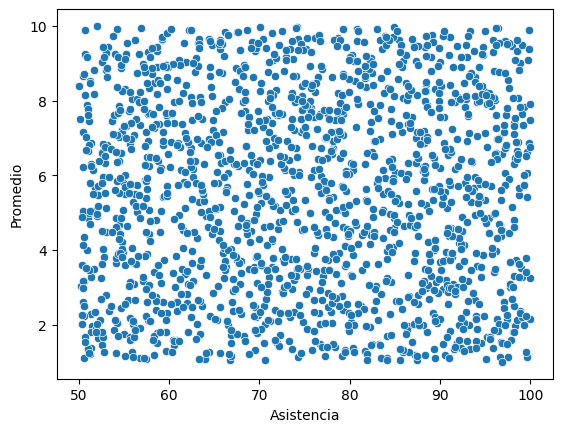

In [22]:
sns.scatterplot(data=df,x="Asistencia", y="Promedio")

<Axes: xlabel='Asistencia', ylabel='Promedio'>

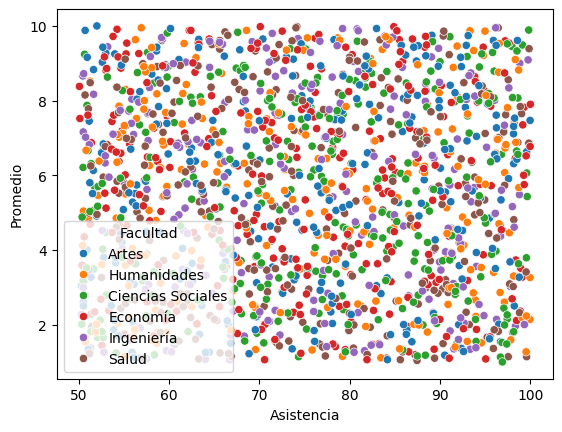

In [23]:
sns.scatterplot(data=df,x="Asistencia", y="Promedio", hue = "Facultad")

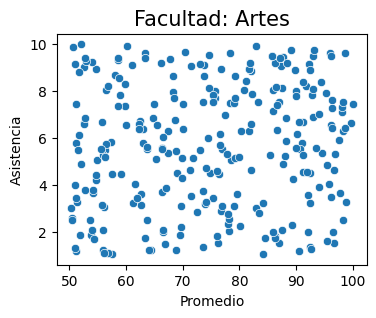

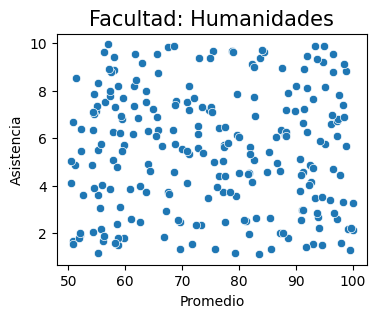

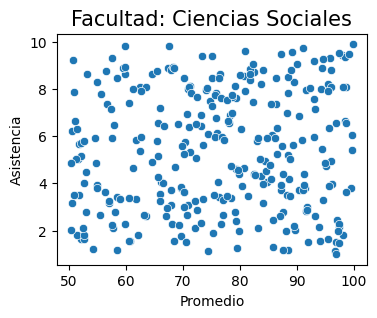

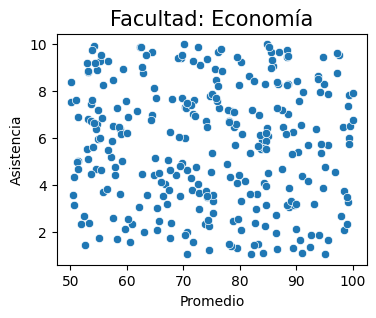

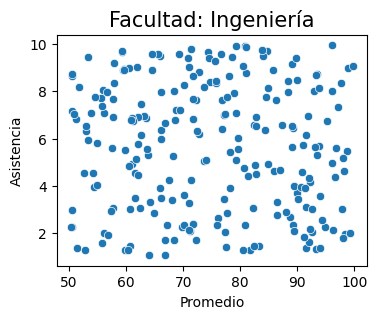

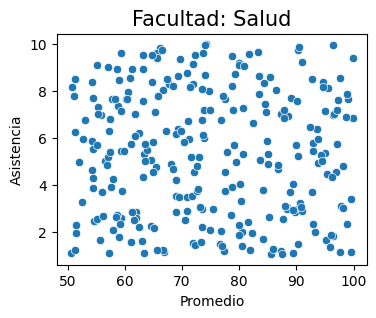

In [24]:
for facultad in df["Facultad"].unique():  # Corregido el método `.unique()`
    plt.figure(figsize=(4,3))  # Ajustado el tamaño del gráfico
    
    df_facultad = df[df["Facultad"] == facultad]  # Filtrar por facultad
    
    sns.scatterplot( data=df_facultad, x="Asistencia", y="Promedio")
    
    plt.title(f"Facultad: {facultad}", size=15)
    plt.xlabel("Promedio")
    plt.ylabel("Asistencia")
    plt.show()

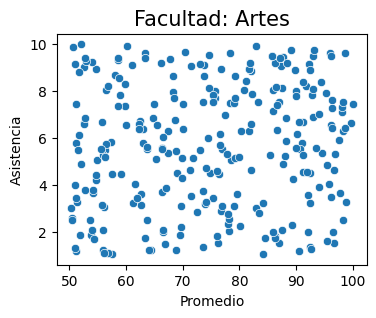

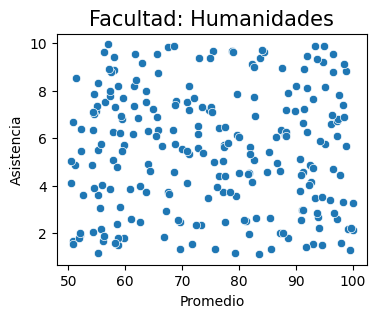

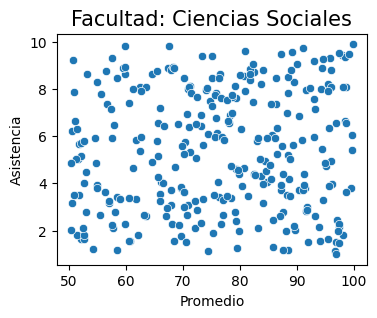

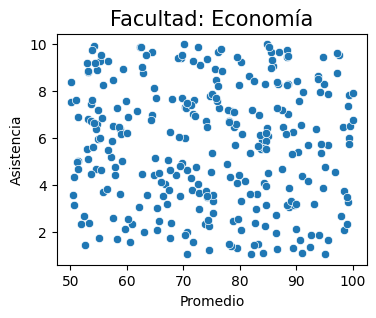

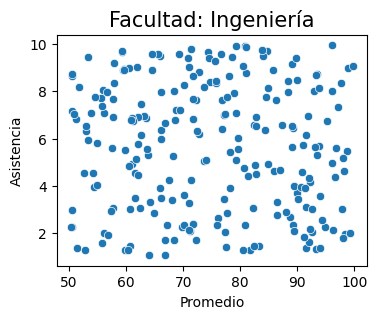

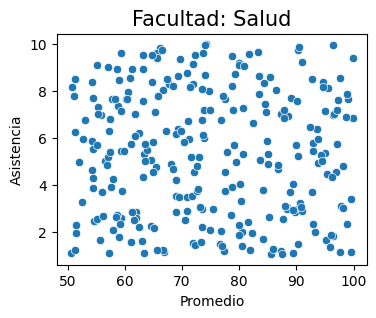

In [25]:
for facultad in df["Facultad"].unique():  # Corregido el método `.unique()`
    plt.figure(figsize=(4,3))  # Ajustado el tamaño del gráfico
    
    df_facultad = df[df["Facultad"] == facultad]  # Filtrar por facultad
    
    sns.scatterplot( data=df_facultad, x="Asistencia", y="Promedio")
    
    plt.title(f"Facultad: {facultad}", size=15)
    plt.xlabel("Promedio")
    plt.ylabel("Asistencia")
    plt.show()

* No se encuentran indicios de alguna posible correlación entre el promedio académico y la asistencia al tomar datos de todo la facultad, por tanto no se entra en detalle a calcular correlación o p-value.

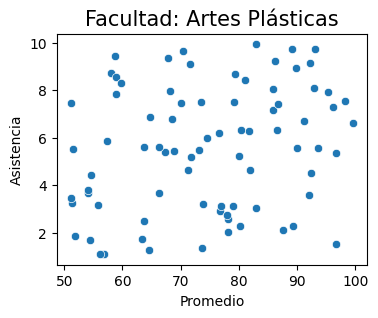

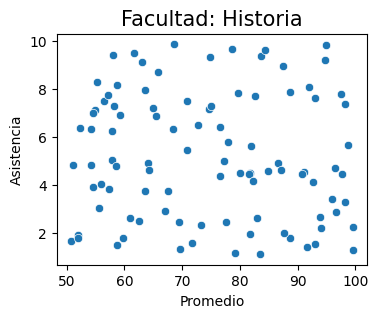

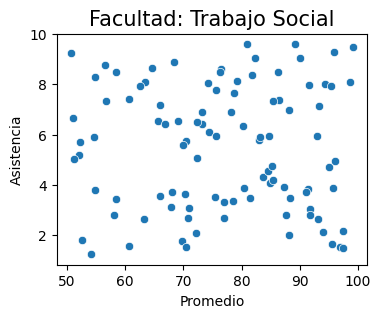

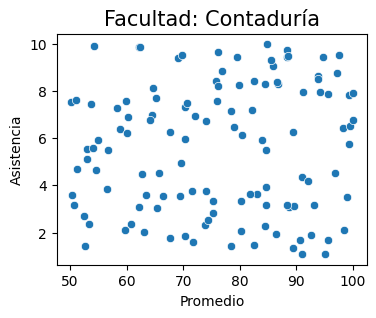

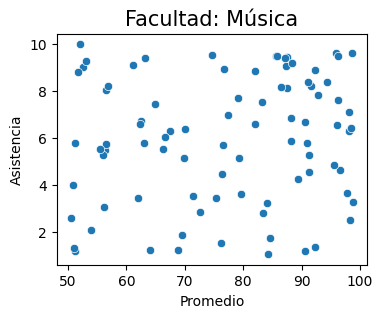

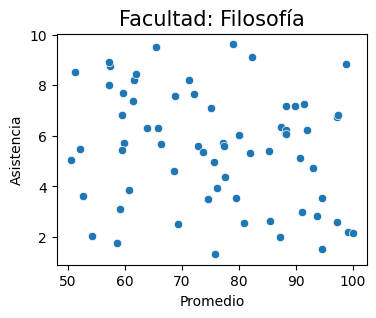

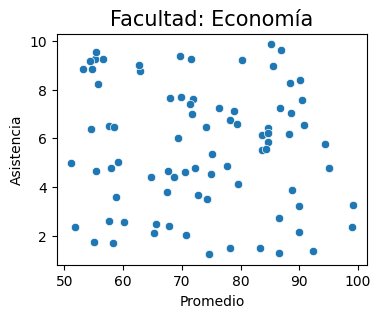

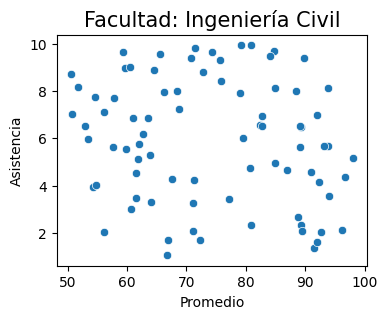

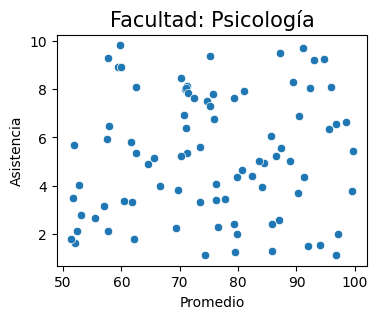

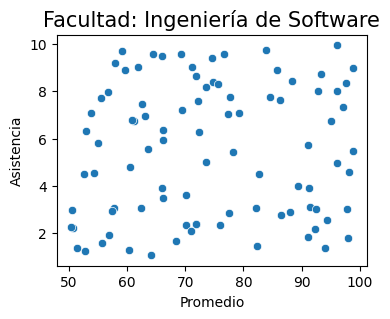

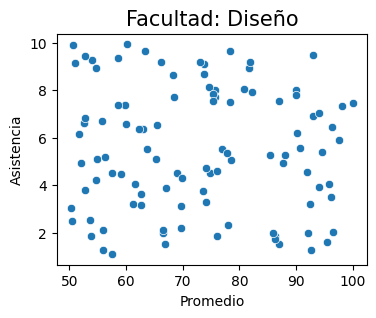

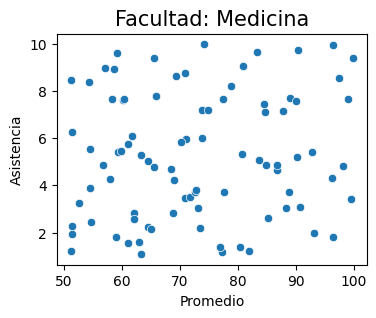

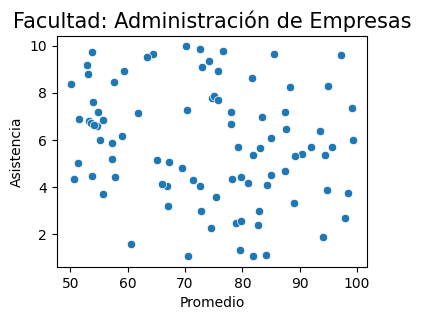

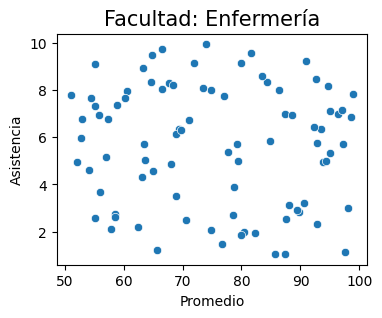

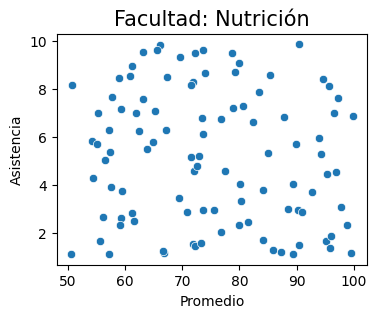

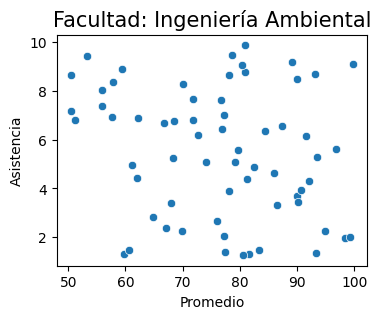

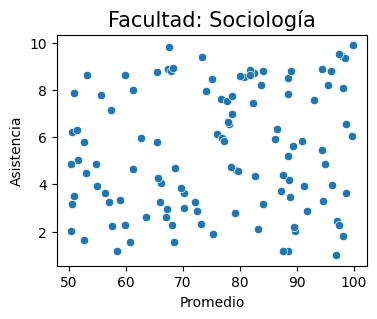

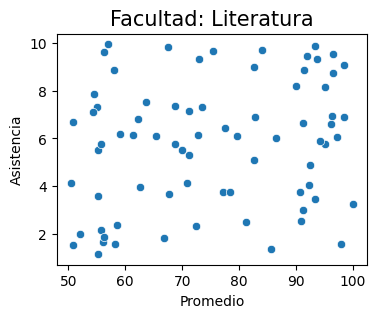

In [26]:
for programa in df["Programa"].unique():  # Corregido el método `.unique()`
    
    plt.figure(figsize=(4,3))  # Ajustado el tamaño del gráfico
    df_programa = df[(df["Programa"] == programa)]  # Filtrar por facultad
    
    sns.scatterplot( data=df_programa, x="Asistencia", y="Promedio")
    
    plt.title(f"Facultad: {programa}", size=15)
    plt.xlabel("Promedio")
    plt.ylabel("Asistencia")
    plt.show()

* No se encuentran indicios de alguna posible relación entre el promedio académico y la asistencia al tomar datos de cada programa.

## ¿Existen diferencias significativas en el rendimiento académico según la facultad o el año de ingreso?

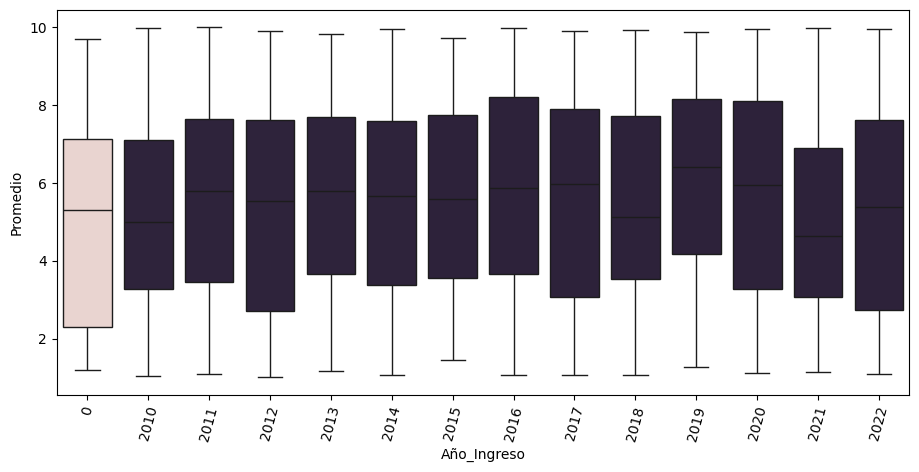

In [27]:
plt.figure(figsize=(11,5)) 
sns.boxplot(data = df, y = "Promedio", x = "Año_Ingreso", hue = "Año_Ingreso", legend = False)
plt.xticks(rotation = 75)
plt.show()

* Los datos no presentan indicativos de una posible diferencia significativa

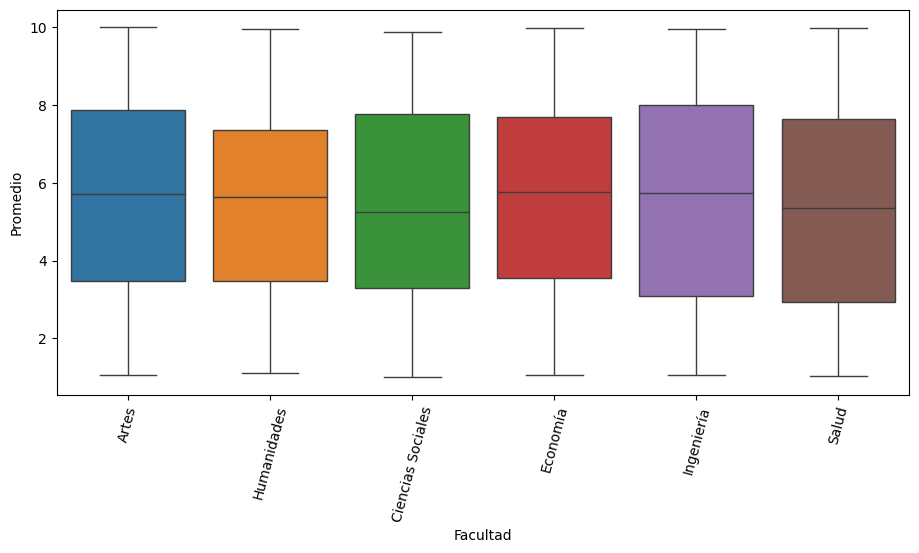

In [28]:
plt.figure(figsize=(11,5)) 
sns.boxplot(data = df, y = "Promedio", x = "Facultad", hue = "Facultad", legend = False)
plt.xticks(rotation = 75)
plt.show()

* No se observan indicios de alguna posible diferencia significativa al considerar los datos por facultad o por año de ingreso.

## ¿ Cual es el comportamiento por año de los estudiantes activos, egresados y retirados?

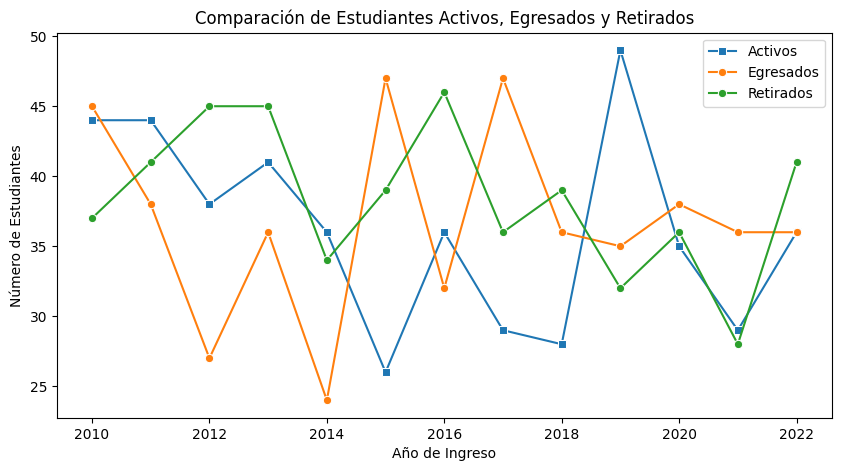

In [100]:
df_retirados = df[df["Estado"] == "Retirado"]
df_retirados = df_retirados[df_retirados["Año_Ingreso"] != 0].groupby(["Año_Ingreso"])["ID_Estudiante"].count().reset_index()

df_activo = df[df["Estado"] == "Activo"]
df_activo = df_activo[df_activo["Año_Ingreso"] != 0].groupby(["Año_Ingreso"])["ID_Estudiante"].count().reset_index()

df_egresado = df[df["Estado"] == "Egresado"]
df_egresado = df_egresado[df_egresado["Año_Ingreso"] != 0].groupby(["Año_Ingreso"])["ID_Estudiante"].count().reset_index()

plt.figure(figsize=(10, 5))

sns.lineplot(data=df_activo, x="Año_Ingreso", y="ID_Estudiante", label="Activos", marker="s")
sns.lineplot(data=df_egresado, x="Año_Ingreso", y="ID_Estudiante", label="Egresados", marker="o")
sns.lineplot(data=df_retirados, x="Año_Ingreso", y="ID_Estudiante", label="Retirados", marker="o")

plt.xlabel("Año de Ingreso")
plt.ylabel("Número de Estudiantes")
plt.title("Comparación de Estudiantes Activos, Egresados y Retirados")
plt.legend()
plt.show()

* Se evidencia el mayor pico de estudiantes activos en el año 2019 para pasar por un posterior descenso en 2020 y 2021. ¿Se deberá a la pandemia?

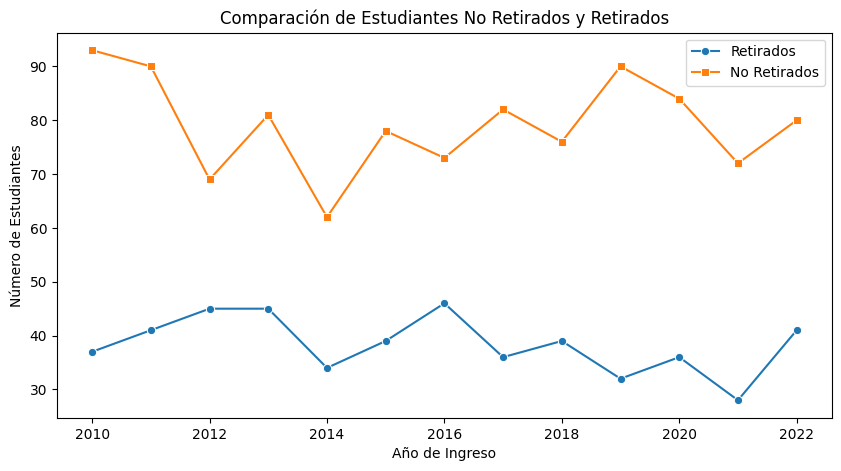

In [117]:
df["Retirado"] = np.where(df["Estado"] == "Retirado", "Retirado", "No Retirado")

df_retirados = df[df["Retirado"] == "Retirado"]
df_retirados = df_retirados[df_retirados["Año_Ingreso"] != 0].groupby(["Año_Ingreso"])["ID_Estudiante"].count().reset_index()

df_no_retirado = df[df["Retirado"] == "No Retirado"]
df_no_retirado = df_no_retirado[df_no_retirado["Año_Ingreso"] != 0].groupby(["Año_Ingreso"])["ID_Estudiante"].count().reset_index()

plt.figure(figsize=(10, 5))

sns.lineplot(data=df_retirados, x="Año_Ingreso", y="ID_Estudiante", label="Retirados", marker="o")
sns.lineplot(data=df_no_retirado, x="Año_Ingreso", y="ID_Estudiante", label="No Retirados", marker="s")

plt.xlabel("Año de Ingreso")
plt.ylabel("Número de Estudiantes")
plt.title("Comparación de Estudiantes No Retirados y Retirados")
plt.legend()
plt.show()

* Si consideramos a los estudiantes activos y egresados como un solo conjunto, se encuentra que de cada año alrededor de un 20 - 25% de los estudiantes se retiran

## ¿Cual es la facultad con mas estudiantes retirados?

In [110]:
retirados_facultad = df[df["Estado"] == "Retirado"].groupby(["Facultad"])["ID_Estudiante"].count().reset_index()
retirados_facultad = retirados_facultad.sort_values(by ='ID_Estudiante',ascending=False)
print(retirados_facultad)

            Facultad  ID_Estudiante
1  Ciencias Sociales             99
2           Economía             90
4         Ingeniería             88
0              Artes             87
3        Humanidades             86
5              Salud             80


* La facultad de ciencias sociales tiene mayor cantidad de estudiantes retirados. Sin embargo demasiado alejado a comparación de las otras facultades

## ¿Cual es el programa con mas estudiantes retirados?

In [113]:
retirados_programa = df[df["Estado"] == "Retirado"].groupby(["Programa"])["ID_Estudiante"].count().reset_index()
retirados_programa = retirados_programa.sort_values(by ='ID_Estudiante',ascending=False)
print(retirados_programa)

                      Programa  ID_Estudiante
3                       Diseño             37
7                     Historia             36
2                   Contaduría             35
16                  Sociología             35
17              Trabajo Social             32
10      Ingeniería de Software             32
15                  Psicología             32
12                    Medicina             32
9             Ingeniería Civil             31
4                     Economía             28
11                  Literatura             27
0   Administración de Empresas             27
13                      Música             26
8         Ingeniería Ambiental             25
14                   Nutrición             25
1              Artes Plásticas             24
6                    Filosofía             23
5                   Enfermería             23


* El programa con mayor cantidad de retirados es Diseño. Una pregunta que surge es ¿qué provoca que Diseño tenga casi el doble de estudiantes retirados comparado con Enfermería?

## ¿Como se comporta el promedio en las facultades, entre estudiantes activos, egresados, retirados y No Registrado?

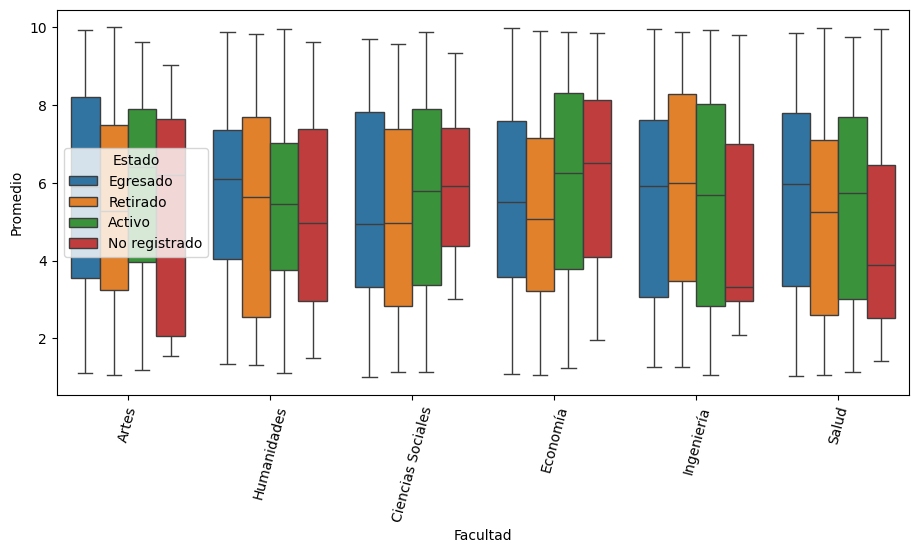

In [37]:
df_retirados = df
plt.figure(figsize=(11,5)) 
sns.boxplot(data = df_retirados, y = "Promedio", x = "Facultad", hue = "Estado", legend = True)
plt.xticks(rotation = 75)
plt.show()

* El primer cuartil de los estudiantes retirados suele ser menor que egresados, activos o no registrados, en la mayoría de facultades.

## ¿Como se comporta el promedio en los programas, entre estudiantes activos, egresados, retirados y no Registrado?

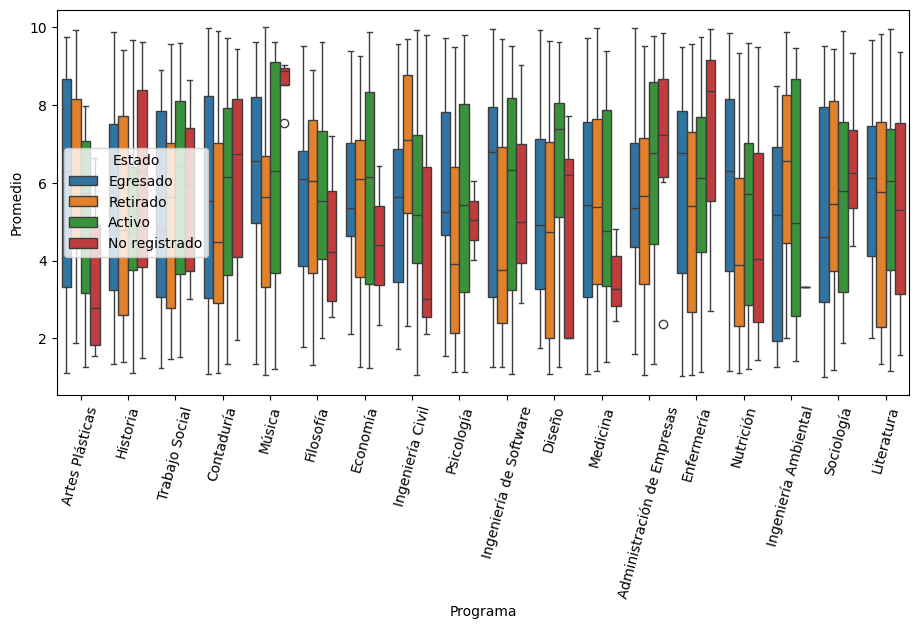

In [39]:
df_retirados = df
plt.figure(figsize=(11,5)) 
sns.boxplot(data = df_retirados, y = "Promedio", x = "Programa", hue = "Estado", legend = True)
plt.xticks(rotation = 75)
plt.show()

## ¿Como se comporta la asistencia en los programas, entre estudiantes activos, egresados, retirados y no Registrado?

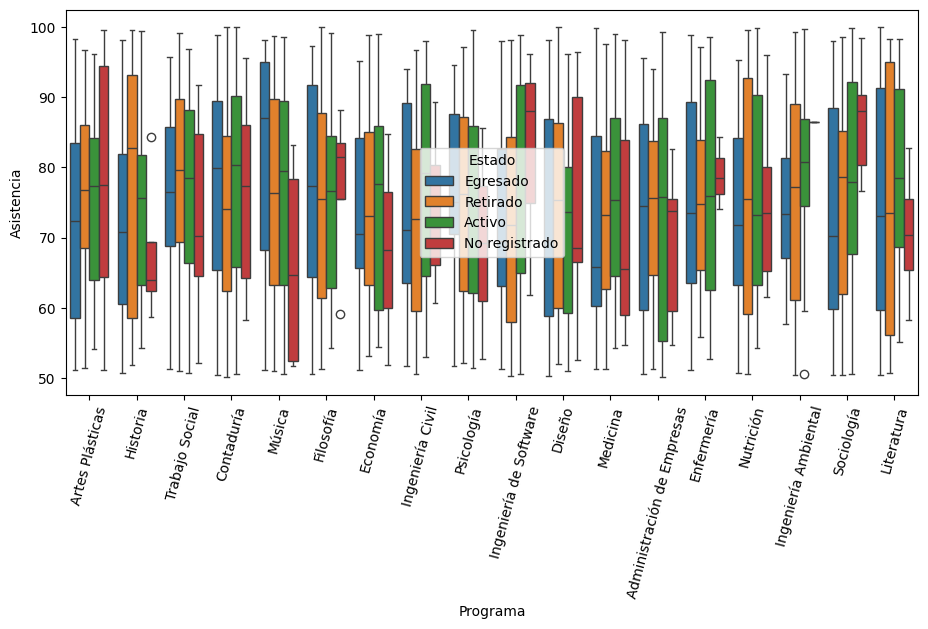

In [40]:
df_retirados = df
plt.figure(figsize=(11,5)) 
sns.boxplot(data = df_retirados, y = "Asistencia", x = "Programa", hue = "Estado", legend = True)
plt.xticks(rotation = 75)
plt.show()

In [42]:
retirados_facultad = df[df["Estado"] == "Retirado"].groupby(["Beca"])["ID_Estudiante"].count().reset_index()
retirados_facultad = retirados_facultad.sort_values(by = 'ID_Estudiante',ascending=False)
print(retirados_facultad)

  Beca  ID_Estudiante
0   No            376
1   Sí            154


## De los estudiantes retirados de cada factultad ¿cuantos no tenian una beca?

In [43]:
retirados_año = df[df["Estado"] == "Retirado"].groupby(["Facultad", "Beca"])["ID_Estudiante"].count()
print(retirados_año)

Facultad           Beca
Artes              No      64
                   Sí      23
Ciencias Sociales  No      66
                   Sí      33
Economía           No      67
                   Sí      23
Humanidades        No      68
                   Sí      18
Ingeniería         No      60
                   Sí      28
Salud              No      51
                   Sí      29
Name: ID_Estudiante, dtype: int64


## ¿Cuantos estudiantes por facultad participaban en actividades extracurriculares?

In [44]:
retirados_año = df[df["Estado"] == "Retirado"].groupby(["Facultad", "Actividad extracurricular"])["ID_Estudiante"].count()
print(retirados_año)

Facultad           Actividad extracurricular
Artes              No                           49
                   Sí                           38
Ciencias Sociales  No                           53
                   Sí                           46
Economía           No                           60
                   Sí                           30
Humanidades        No                           67
                   Sí                           19
Ingeniería         No                           62
                   Sí                           26
Salud              No                           42
                   Sí                           38
Name: ID_Estudiante, dtype: int64
